# HiC link size empirical distributions for datasets in ALLHiC paper

We plot the link size (x-axis) vs link density (y-axis) for each of the four datasets used in the ALLHiC paper. We then try to infer the coeffiencients in the power law model.

$$Y=A \times X^B$$

Based on `allhic extract`, the coefficients for the four datasets are:
- Ler0 (AAGCTT): $Y=0.00162 \times X^{-0.8135}$
- Rice (GATC): $Y=0.000347 \times X^{-0.8042}$
- AP85 Chr1A (AAGCTT): $Y=1.62e^{-5} \times X^{-0.8164}$
- Molokai Chr01A (AAGCTT): $Y=0.000325 \times X^{-0.8844}$

## Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd

## Load data

In [7]:
def load_hic_data(filename):
    """ Load tabular datasets on `distribution.txt`
    File can be loaded directly into dataframe as first line contains header.
    """
    df = pd.read_csv(filename, sep="\t")
    xf = df[df["NumLinks"] != 0]
    return xf

df = load_hic_data("ArabidopsisLer_RE_AAGCTT.distribution.txt")
df.head()

,#Bin,BinStart,BinSize,NumLinks,TotalSize,LinkDensity
0,0,2048,90,45072,119653414,0.000004
1,1,2138,95,49670,119652784,0.000004
2,2,2233,99,44248,119652119,0.000004
3,3,2332,103,44274,119651426,0.000004
4,4,2435,108,45417,119650705,0.000004


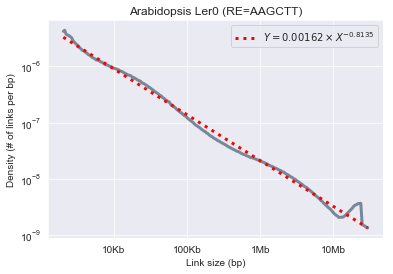

In [42]:
#---- Copied from jcvi.graphics.base
from functools import partial
import matplotlib.ticker as ticker

# human readable size (Kb, Mb, Gb)
def human_readable(x, pos, base=False):
    x = str(int(x))
    if x.endswith("000000000"):
        x = x[:-9] + "G"
    elif x.endswith("000000"):
        x = x[:-6] + "M"
    elif x.endswith("000"):
        x = x[:-3] + "K"
    if base and x[-1] in "MK":
        x += "b"
    return x

human_readable_base = partial(human_readable, base=True)
human_formatter = ticker.FuncFormatter(human_readable)
human_base_formatter = ticker.FuncFormatter(human_readable_base)
#------

def plot_distribution(A, B, title, label, filename):
    df = load_hic_data(filename)
    regression = lambda A, B, X: A * X ** B
    ax = sns.lineplot(x="BinStart", y="LinkDensity", data=df, lw=3, color="lightslategray")
    tx = df['BinStart']
    ty = [regression(A, B, x) for x in tx]
    ax.plot(tx, ty, 'r:', lw=3, label=label)
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Link size (bp)")
    ax.set_ylabel("Density (# of links per bp)")
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    ax.xaxis.set_major_formatter(human_base_formatter)

A, B = 0.00162, -0.8135
title = "Arabidopsis Ler0 (RE=AAGCTT)"
label = r"$Y=0.00162 \times X^{-0.8135}$"
filename = "ArabidopsisLer_RE_AAGCTT.distribution.txt"
plot_distribution(A, B, title, label, filename)

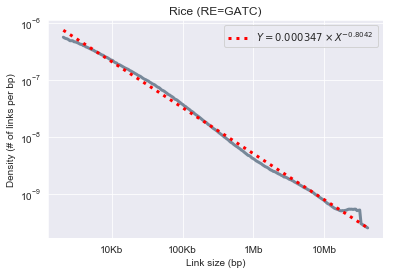

In [43]:
A, B = 0.000347, -0.8042
title = "Rice (RE=GATC)"
label = r"$Y=0.000347 \times X^{-0.8042}$"
filename = "Rice_RE_GATC.distribution.txt"
plot_distribution(A, B, title, label, filename)

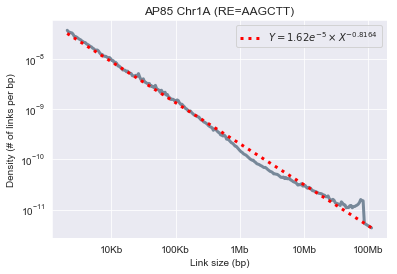

In [44]:
A, B = 1.62e-5, -0.8164
title = "AP85 Chr1A (RE=AAGCTT)"
label = r"$Y=1.62e^{-5} \times X^{-0.8164}$"
filename = "AP85_RE_AAGCTT.Chr1A.distribution.txt"
plot_distribution(A, B, title, label, filename)

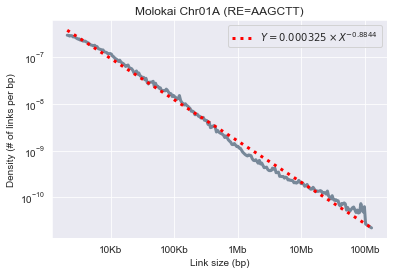

In [46]:
A, B = 0.000325, -0.8844
title = "Molokai Chr01A (RE=AAGCTT)"
label = r"$Y=0.000325 \times X^{-0.8844}$"
filename = "Molokai_RE_AAGCTT.Chr01A.distribution.txt"
plot_distribution(A, B, title, label, filename)